In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [2]:
full = pd.read_csv('normalised.csv', index_col=0, header=[0] ,parse_dates=True)
full.head()

,CPIAUCSL,FEDFUNDS,HOUST,INDPRO,INTDSRUSM193N,ISRATIO,M2SL,MTSDS133FMS,PAYEMS,PCE,...,CIVPART,GS20,GS3,IRLTLT01USM156N,M1SL,MCOILWTICO,PPIACO,TCU,TOTALSA,PMI
1914-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.635906,NaN,NaN,NaN
1914-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.543396,NaN,NaN,NaN
1914-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.638258,NaN,NaN,NaN
1914-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.638258,NaN,NaN,NaN
1914-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.640650,NaN,NaN,NaN


In [ ]:
# retain yoy
full.drop(columns=['A191RL1Q225SBEA', 'GDPCI'], inplace=True)

In [5]:
slice = full.loc["1960-01-01"].isna()

for i, v in slice.items():
    if v is True:
        print(i)

print(slice.value_counts())

ISRATIO
MTSDS133FMS
T10Y2YM
USSLIND
GFDEGDQ188S
MCOILWTICO
TCU
TOTALSA
False    23
True      8
Name: 1960-01-01 00:00:00, dtype: int64


In [6]:
sliced = full.loc["1960-01-01":"2019-01-01"]
sliced.shape

(709, 31)

In [6]:
# which ones are null?

for series in sliced:
    col = sliced[series]
    if col.isna().value_counts().loc[False] < sliced.shape[0]:
        print(series)
        sliced = sliced.drop(columns=series)
        
sliced.shape

INTDSRUSM193N
ISRATIO
MTSDS133FMS
T10Y2YM
USSLIND
GFDEGDQ188S
GS20
MCOILWTICO
TCU
TOTALSA


(709, 21)

In [11]:
y = sliced["A191RO1Q156NBEA"]
X = sliced.drop(columns="A191RO1Q156NBEA")

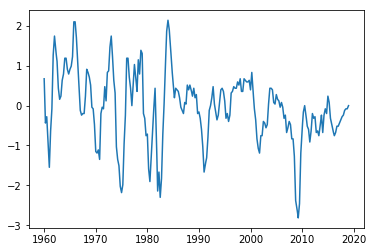

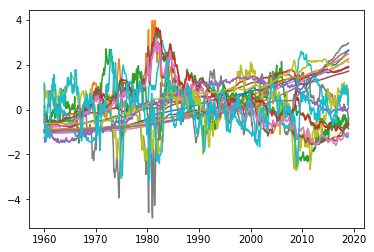

In [12]:
plt.plot(y)
plt.show()
plt.plot(X)
plt.show()
# This is obviously nonsensical since data is trending

In [13]:
reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit(X, y)

RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [14]:
reg.alpha_

0.1

In [15]:
reg.score(X, y)
# Spurious regression I think

0.7886592286562918